In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
df = pd.read_csv("knn3DecisionStatistics.csv", names=['class','scores'])
df.head()

,class,scores
0,0,0.00000
1,1,0.66667
2,1,0.00000
3,1,0.33333
4,1,0.66667


In [3]:
n_H0 = len(df[df['class']==0])
n_H1 = len(df[df['class']==1])
n_H0, n_H1

(100, 100)

In [4]:
PD_list = []
PFA_list = []

for j in range(100):
    n_D = 0
    n_FA = 0
    for i in range(len(df)):
        if df.loc[i]['scores'] >= 0.33:
            pred = 1
        else:
            prob = random.random()
            if prob <= 0.75:
                pred = 1
            else:
                pred = 0
        if df.loc[i]['class']==1 and pred==1:
            n_D += 1
        if df.loc[i]['class']==0 and pred==1:
            n_FA += 1
    P_D = n_D / n_H1
    P_FA = n_FA / n_H0
    PD_list.append(P_D)
    PFA_list.append(P_FA)
mu_PD = sum(PD_list) / len(PD_list)
mu_PFA = sum(PFA_list) / len(PFA_list)
mu_PD

0.9501999999999999

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


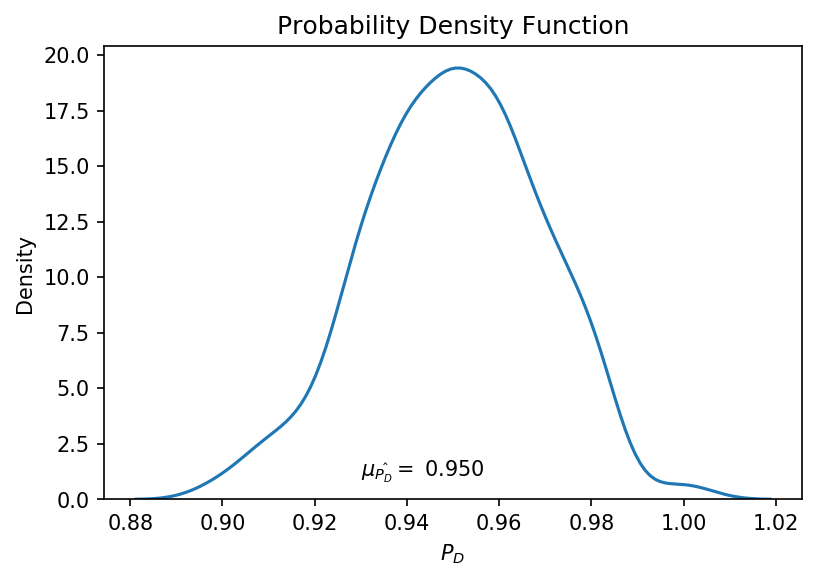

In [5]:
fig, ax = plt.subplots()
fig.set_dpi(150)
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.text(0.93, 1, '$\mu_{\hat{P_D}}=$ %.3f' % mu_PD)
sns.distplot(PD_list, hist=False, axlabel='$P_D$', ax=ax)

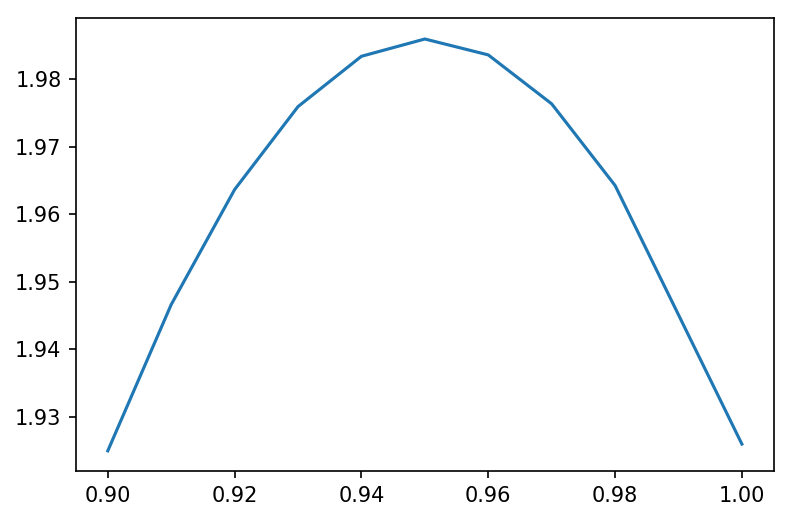

In [6]:
PD_2D = np.array(PD_list)
PD_2D = np.sort(PD_2D)
PD_2D = PD_2D[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(PD_2D)
scores = kde.score_samples(PD_2D)
scores = np.exp(scores)
fig = plt.figure(dpi=150)
plt.plot(PD_2D, scores)

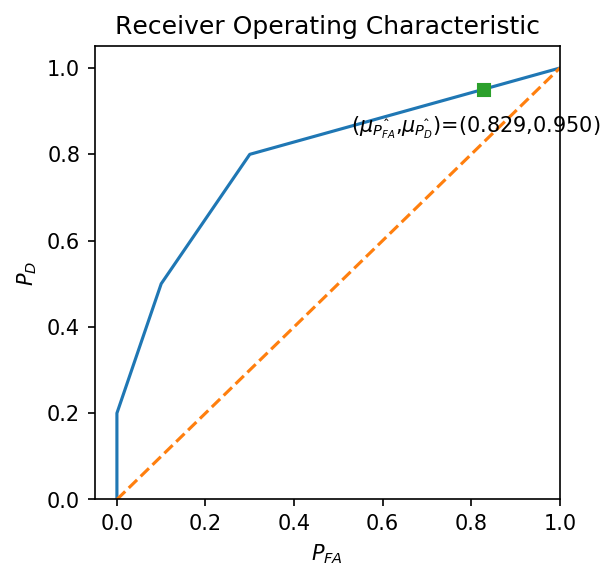

In [7]:
fpr, tpr, thresholds = metrics.roc_curve(df['class'], df['scores'])
plt.figure(figsize=(4,4), dpi=150)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.plot(mu_PFA, mu_PD, marker='s')
plt.annotate('($\mu_{\hat{P_{FA}}}$,$\mu_{\hat{P_D}}$)=(%.3f,%.3f)' % (mu_PFA, mu_PD), (mu_PFA-0.3, mu_PD-0.1))
plt.show()